In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
mnist = tf.keras.datasets.mnist #28 x 28 images of hand written digits 0-9

In [3]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()


Normalize the dataset

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

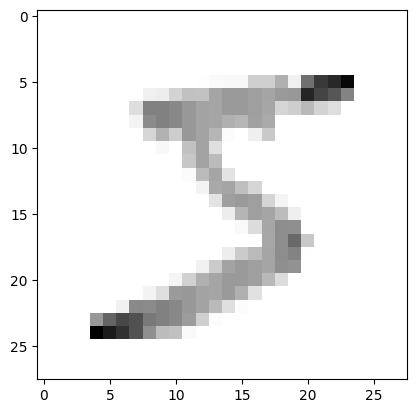

In [5]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2607 - accuracy: 0.9229
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1065 - accuracy: 0.9679
Epoch 3/4
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0730 - accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - accuracy: 0.9827


Model in CNN:

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))          # kernel_initializer='he_uniform'
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 51s 26ms/step - loss: 0.1448 - accuracy: 0.9542
Epoch 2/4
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0460 - accuracy: 0.9854
Epoch 3/4
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 4/4
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0238 - accuracy: 0.9927


In [7]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0282 - accuracy: 0.9913


In [108]:
# model.save('epic_model_CNN_num_detection')

INFO:tensorflow:Assets written to: epic_model_CNN_num_detection\assets


INFO:tensorflow:Assets written to: epic_model_CNN_num_detection\assets


In [18]:
new_model = tf.keras.models.load_model('epic_model_num_detection')
new_model

In [9]:
prediction = model.predict([x_test])

313/313 [==============================] - 4s 10ms/step


In [10]:
print (prediction)

[[1.4426672e-09 3.0044306e-10 6.1819128e-06 ... 9.9998975e-01
  1.2058817e-08 6.5588301e-07]
 [1.5140492e-05 3.4440858e-05 9.9993527e-01 ... 6.5646150e-06
  1.2509171e-06 7.5671828e-08]
 [5.3394383e-06 9.9970657e-01 9.8086921e-06 ... 1.3664250e-04
  3.7366350e-05 1.7723954e-05]
 ...
 [3.2385644e-12 2.1218415e-08 5.7356220e-11 ... 8.0889066e-08
  7.7994834e-08 3.1412068e-08]
 [2.8171536e-12 6.9069282e-14 2.7841893e-12 ... 8.9474712e-11
  7.8658724e-07 4.4578456e-12]
 [2.4430665e-06 1.5470488e-07 8.0089478e-08 ... 6.2351706e-09
  2.5091656e-06 2.1420783e-08]]


In [11]:
print (np.argmax(prediction[1]))

2


<function matplotlib.pyplot.show(close=None, block=None)>

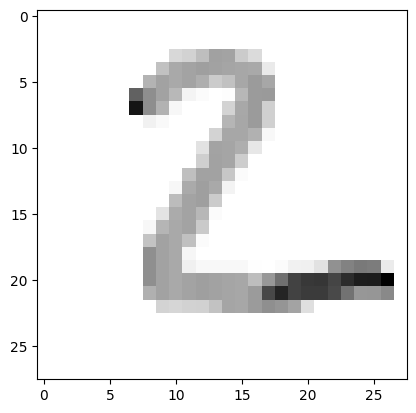

In [12]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show

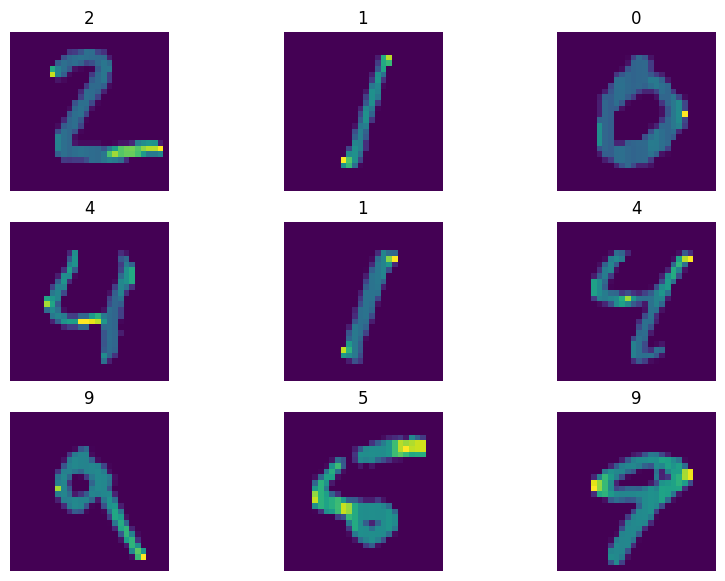

In [14]:
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3

for p in range (1,10):
    fig.add_subplot(rows, columns, (p))
    plt.imshow(x_test[p])
    plt.axis('off')
    plt.title(np.argmax(prediction[p])) 

313/313 [==============================] - 1s 4ms/step


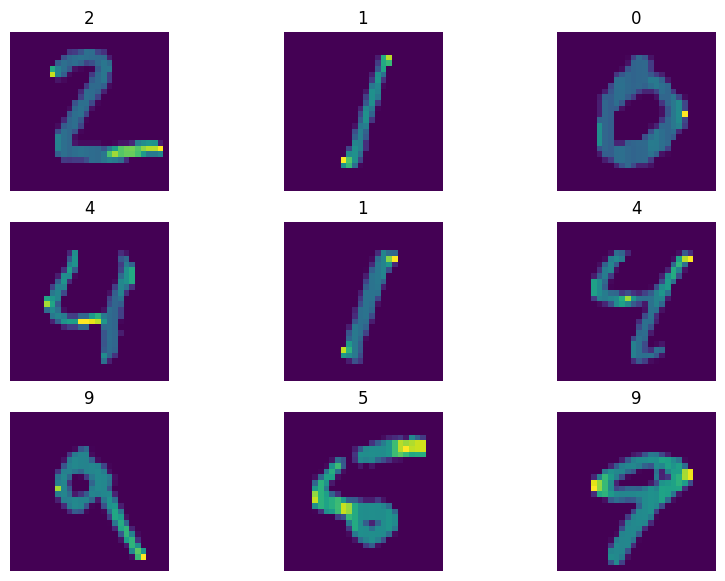

In [20]:
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3
new_pred = new_model.predict([x_test])
for p in range (1,10):
    fig.add_subplot(rows, columns, (p))
    plt.imshow(x_test[p])
    plt.axis('off')
    plt.title(np.argmax(new_pred[p])) 

In [22]:
img_path = "number-test-imgs/"           #path of the test images.

1/1 [==============================] - 0s 356ms/step
2


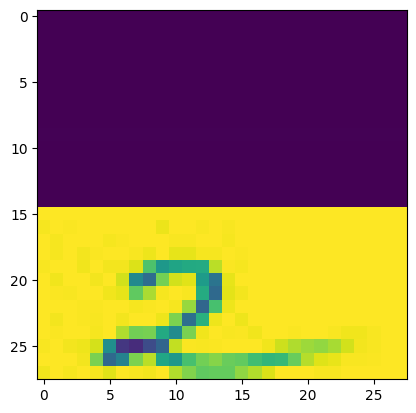

In [23]:
p = plt.imread(img_path+"2.jpg")
plt.imshow(p)
print (np.argmax(model.predict([p.reshape(-1,28,28,1)])))

1/1 [==============================] - 0s 318ms/step
2


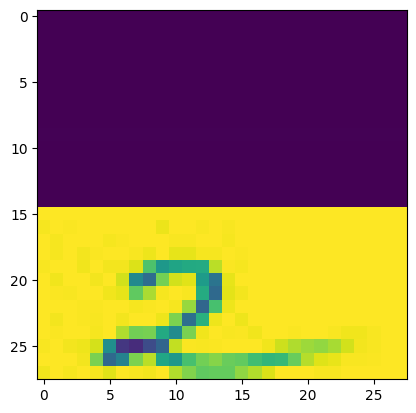

In [24]:
p = plt.imread(img_path+"2.jpg")
plt.imshow(p)
print (np.argmax(new_model.predict([p.reshape(-1,28,28,1)])))

1/1 [==============================] - 0s 248ms/step


(-0.5, 27.5, 27.5, -0.5)

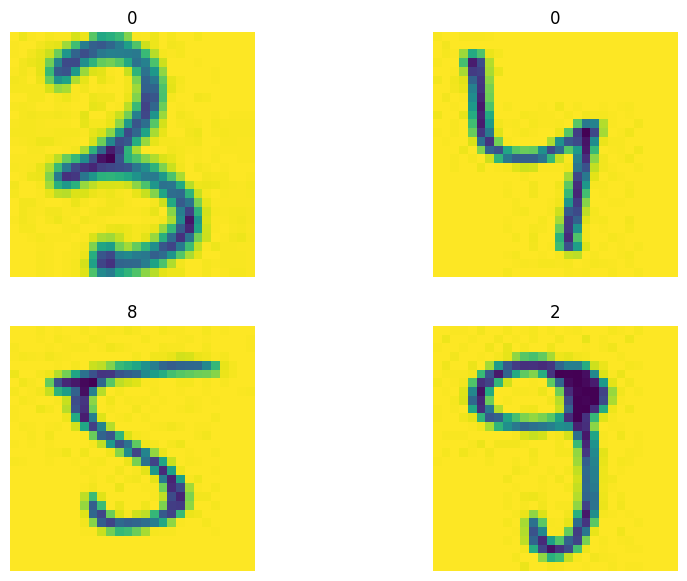

In [25]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2,2,1)
p = plt.imread(img_path+"#.jpg")
plt.imshow(p)
plt.title(np.argmax(model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,2)
p = plt.imread(img_path+"4.jpg")
plt.imshow(p)
plt.title(np.argmax(model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,3)
p = plt.imread(img_path+"5.jpg")
plt.imshow(p)
plt.title(np.argmax(model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,4)
p = plt.imread(img_path+"9.jpg")
plt.imshow(p)
plt.title(np.argmax(model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')



1/1 [==============================] - 0s 254ms/step


(-0.5, 27.5, 27.5, -0.5)

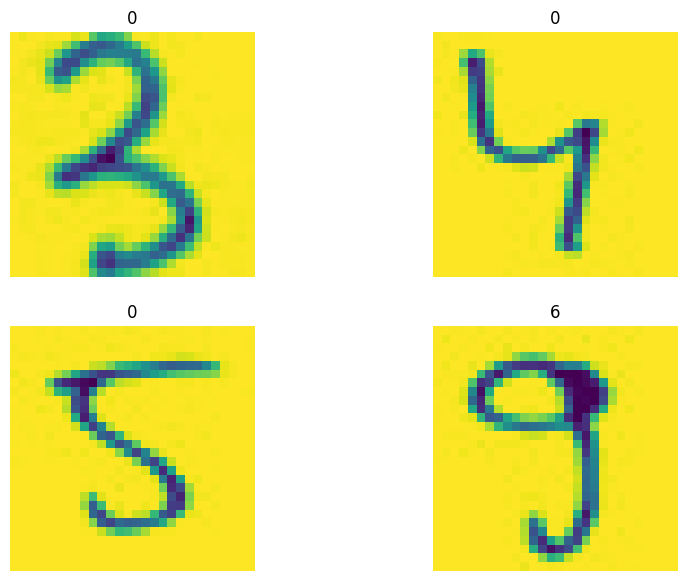

In [26]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2,2,1)
p = plt.imread(img_path+"#.jpg")
plt.imshow(p)
plt.title(np.argmax(new_model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,2)
p = plt.imread(img_path+"4.jpg")
plt.imshow(p)
plt.title(np.argmax(new_model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,3)
p = plt.imread(img_path+"5.jpg")
plt.imshow(p)
plt.title(np.argmax(new_model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')

fig.add_subplot(2,2,4)
p = plt.imread(img_path+"9.jpg")
plt.imshow(p)
plt.title(np.argmax(new_model.predict([p.reshape(-1,28,28,1)])))
plt.axis('off')
